# seaborn: statistical data visualization

In [3]:
# import the library
import seaborn as sns

In [5]:
# Set the theme
# We apply the default default seaborn theme, scaling, and color palette.
sns.set()

In [6]:
import pandas as pd
iris = pd.read_csv("./data/iris.data", sep="\t")
iris.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

## Visualizing statistical relationships

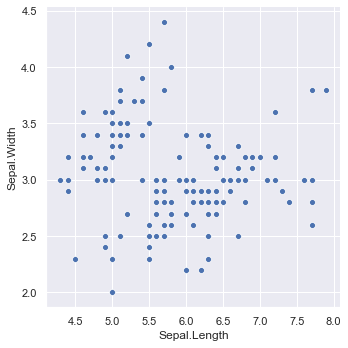

In [8]:
sns.relplot(x = 'Sepal.Length', y = 'Sepal.Width', data = iris)

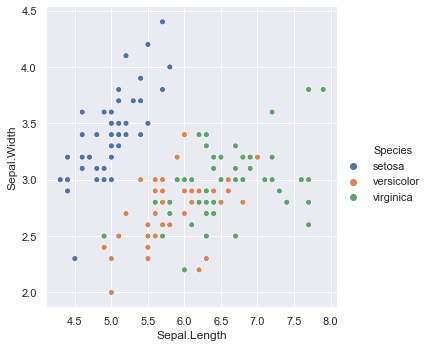

In [9]:
sns.relplot(x = 'Sepal.Length', y = 'Sepal.Width', hue = 'Species', data = iris)

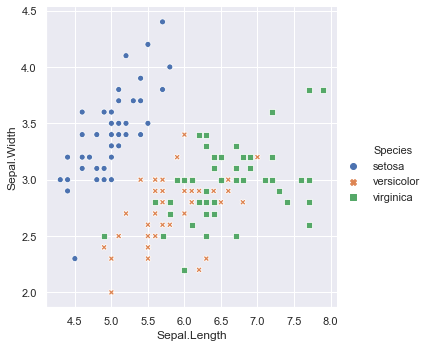

In [11]:
# different marker style
sns.relplot(x = 'Sepal.Length', y = 'Sepal.Width', hue = 'Species', style = "Species", data = iris)

In [16]:
iris['type'] = iris['Sepal.Length'] > 5
iris.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species   type
0           5.1          3.5           1.4          0.2  setosa   True
1           4.9          3.0           1.4          0.2  setosa  False
2           4.7          3.2           1.3          0.2  setosa  False
3           4.6          3.1           1.5          0.2  setosa  False
4           5.0          3.6           1.4          0.2  setosa  False

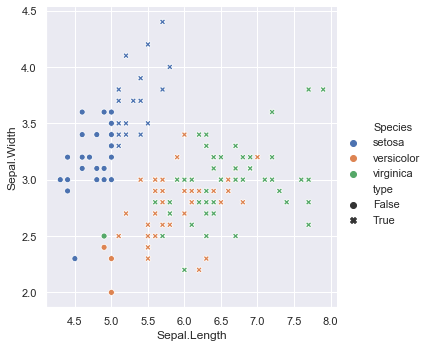

In [18]:
# hue and style is set to different property
sns.relplot(x = 'Sepal.Length', y = 'Sepal.Width', hue = 'Species', style = "type", data = iris)

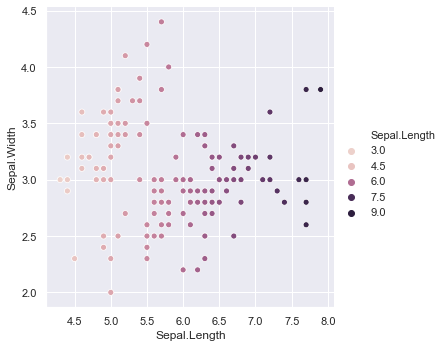

In [20]:
# hue is set to continious scale
sns.relplot(x = 'Sepal.Length', y = 'Sepal.Width', hue = 'Sepal.Length', data = iris)

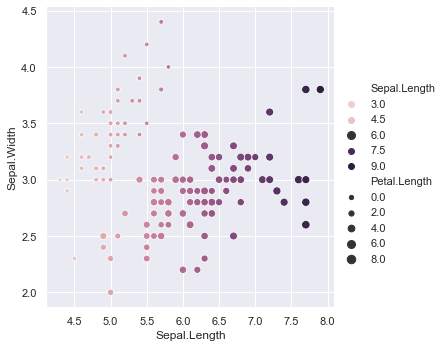

In [24]:
# size
sns.relplot(x = 'Sepal.Length', y = 'Sepal.Width', hue = 'Sepal.Length', size = 'Petal.Length',data = iris)

## Line Plot

Aggregation and representing uncertainty


More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:

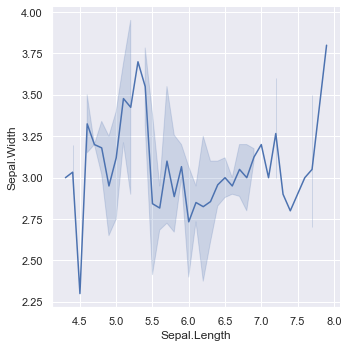

In [34]:
sns.relplot(x = 'Sepal.Length', y = 'Sepal.Width', kind = "line", data = iris)

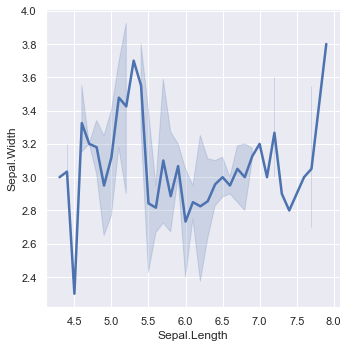

In [46]:
# linewidth
sns.relplot(x = 'Sepal.Length', y = 'Sepal.Width', kind = "line", data = iris, linewidth=2.5)

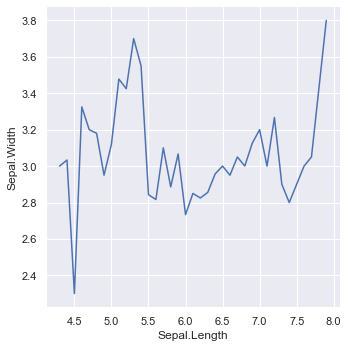

In [31]:
sns.relplot(x = 'Sepal.Length', y = 'Sepal.Width', kind = "line", data = iris, ci = None)

Another good option, especially with larger data, is to represent the spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:

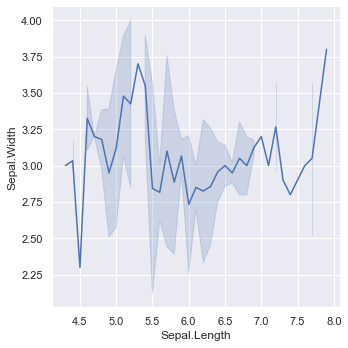

In [32]:
sns.relplot(x = 'Sepal.Length', y = 'Sepal.Width', kind = "line", data = iris, ci = "sd")

To turn off aggregation altogether, set the estimator parameter to None This might produce a strange effect when the data have multiple observations at each point.

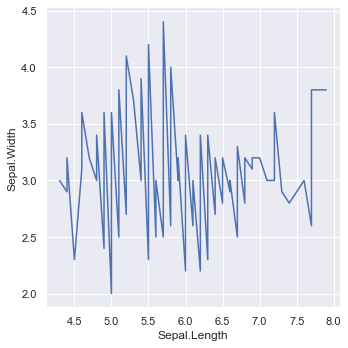

In [35]:
sns.relplot(x = 'Sepal.Length', y = 'Sepal.Width', kind = "line", data = iris, ci = "sd", estimator=None)

Because lineplot() assumes that you are most often trying to draw y as a function of x, the default behavior is to sort the data by the x values before plotting. However, this can be disabled:

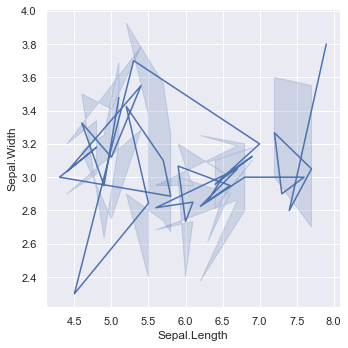

In [28]:
sns.relplot(x = 'Sepal.Length', y = 'Sepal.Width', kind = "line", data = iris, sort = False)

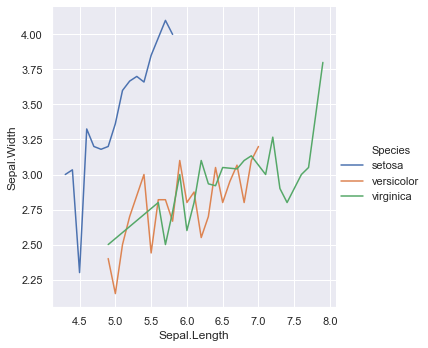

In [37]:
sns.relplot(x = 'Sepal.Length', y = 'Sepal.Width', hue = 'Species', kind = "line", data = iris, ci = None)

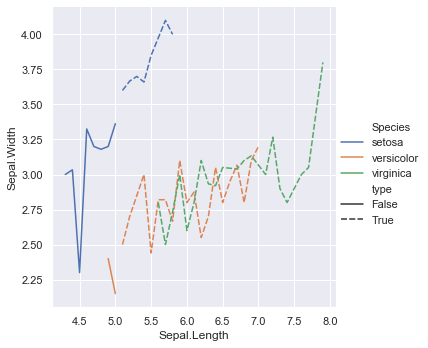

In [38]:
sns.relplot(x = 'Sepal.Length', y = 'Sepal.Width', hue = 'Species', kind = "line", style = "type", data = iris, ci = None)

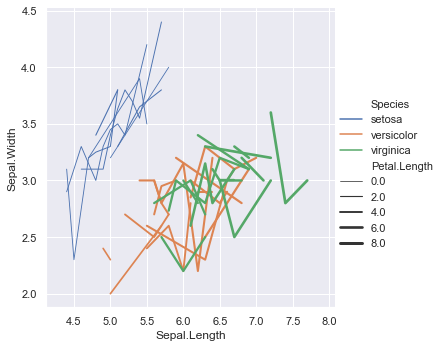

In [39]:
sns.relplot(x = 'Sepal.Length', y = 'Sepal.Width', hue = 'Species', size = "Petal.Length", kind = "line", data = iris, ci = None)

## Faceting

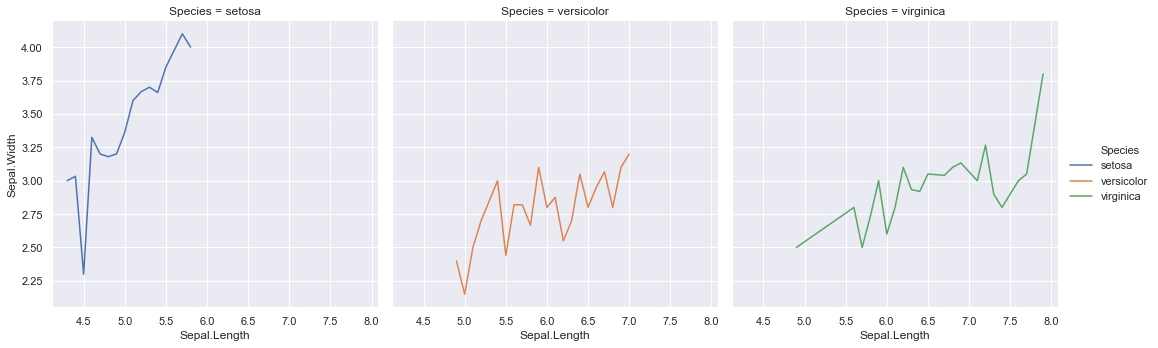

In [41]:
# set col param
sns.relplot(x = 'Sepal.Length', y = 'Sepal.Width', hue = 'Species',col='Species', kind = "line", data = iris, ci = None)

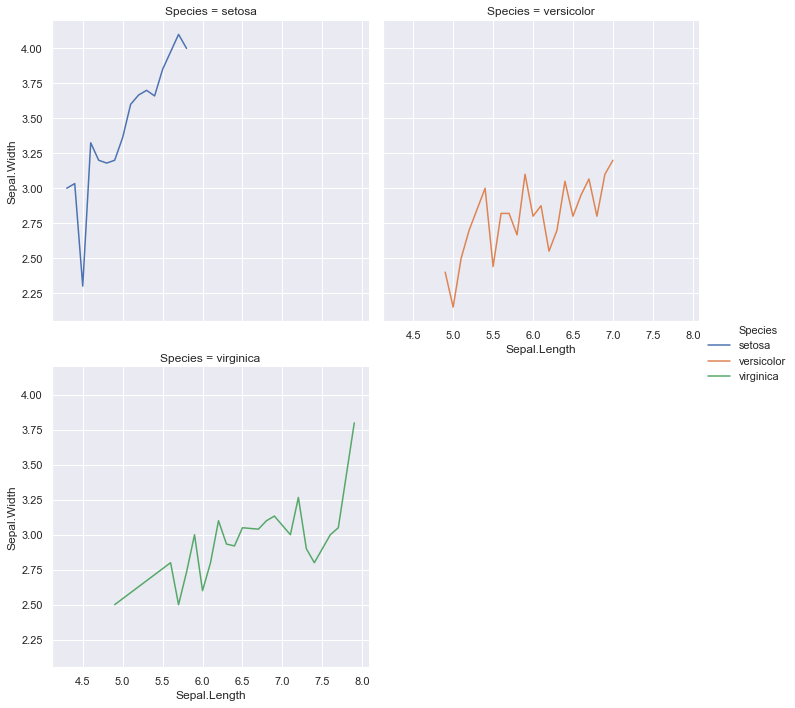

In [44]:
# set col param
# wrap after 2 columns using col_wrap
sns.relplot(x = 'Sepal.Length', y = 'Sepal.Width', hue = 'Species',col='Species', kind = "line", data = iris, ci = None, col_wrap = 2)

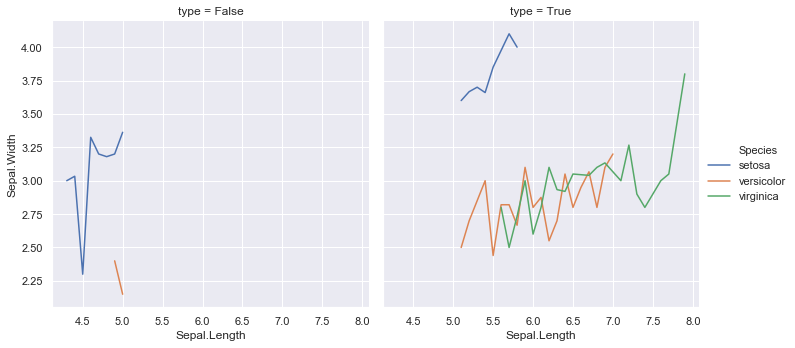

In [42]:
# set col param
sns.relplot(x = 'Sepal.Length', y = 'Sepal.Width', hue = 'Species',col='type', kind = "line", data = iris, ci = None)

# Categorical scatterplots

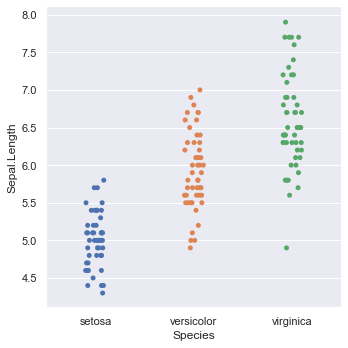

In [48]:
sns.catplot(x="Species", y="Sepal.Length", data=iris)

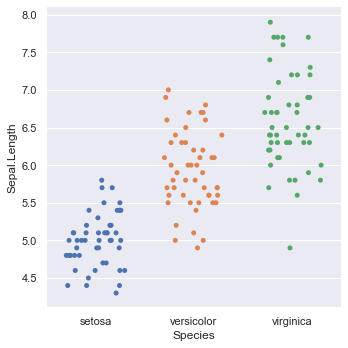

In [54]:
# The jitter parameter controls the magnitude of jitter or disables it altogether:
sns.catplot(x="Species", y="Sepal.Length", data=iris, jitter = 0.3)

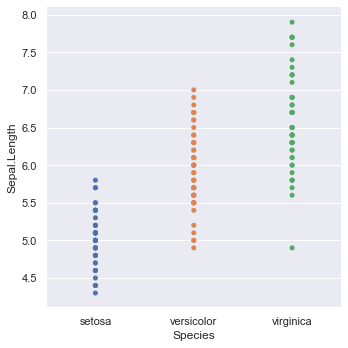

In [55]:
sns.catplot(x="Species", y="Sepal.Length", data=iris, jitter = 0)

### swarm

The second approach adjusts the points along the categorical axis using an algorithm that prevents them from overlapping. It can give a better representation of the distribution of observations, although it only works well for relatively small datasets. This kind of plot is sometimes called a “beeswarm” and is drawn in seaborn by swarmplot(), which is activated by setting kind="swarm" in catplot():

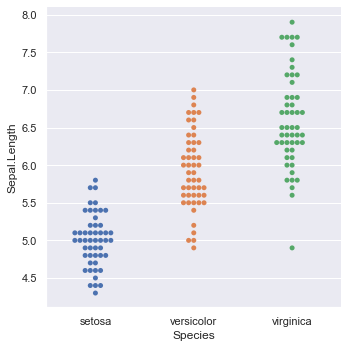

In [56]:
sns.catplot(x="Species", y="Sepal.Length", kind = "swarm",data=iris)

### hue param

Similar to the relational plots, it’s possible to add another dimension to a categorical plot by using a hue semantic. (The categorical plots do not currently support size or style semantics). 

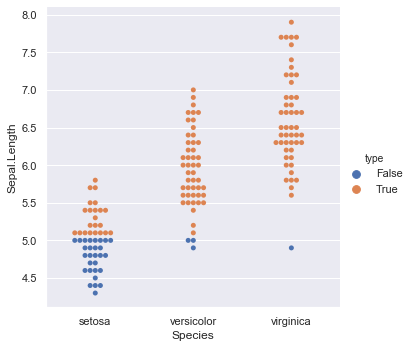

In [57]:
sns.catplot(x="Species", y="Sepal.Length", hue = "type",kind = "swarm",data=iris)

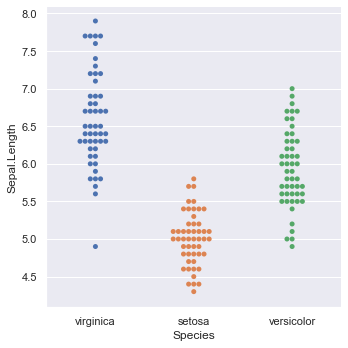

In [58]:
# change order
sns.catplot(x="Species", y="Sepal.Length", kind = "swarm",data=iris, order = ['virginica','setosa','versicolor'])

We’ve referred to the idea of “categorical axis”. In these examples, that’s always corresponded to the horizontal axis. But it’s often helpful to put the categorical variable on the vertical axis (particularly when the category names are relatively long or there are many categories). To do this, swap the assignment of variables to axes:

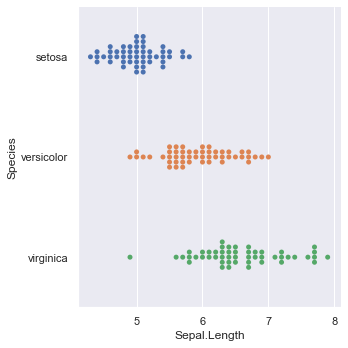

In [60]:
# swap
sns.catplot(x="Sepal.Length", y="Species", kind = "swarm",data=iris)

# Boxplot

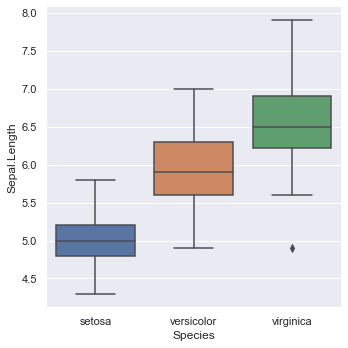

In [61]:
sns.catplot(x="Species", y="Sepal.Length", kind = "box",data=iris)

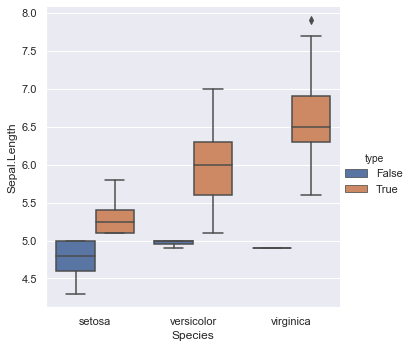

In [63]:
sns.catplot(x="Species", y="Sepal.Length",hue = "type", kind = "box",data=iris)

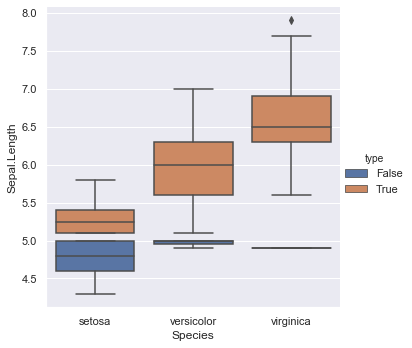

In [65]:
# This behavior is called “dodging” and is turned on by default because it is assumed that the semantic variable is nested within the main categorical variable. If that’s not the case, you can disable the dodging:
sns.catplot(x="Species", y="Sepal.Length",hue = "type", kind = "box",data=iris, dodge = False)

# Boxen plot

A related function, boxenplot(), draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets:

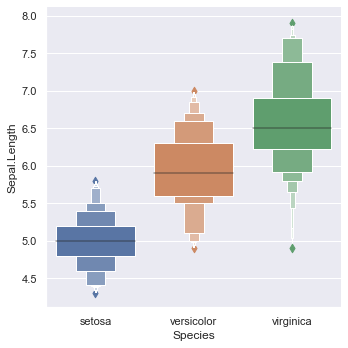

In [67]:
sns.catplot(x="Species", y="Sepal.Length", kind = "boxen",data=iris)

# Violinplots

A different approach is a violinplot(), which combines a boxplot with the kernel density estimation procedure`m

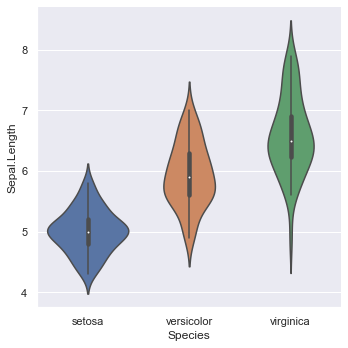

In [70]:
sns.catplot(x="Species", y="Sepal.Length", kind = "violin",data=iris)

This approach uses the kernel density estimate to provide a richer description of the distribution of values. Additionally, the quartile and whisker values from the boxplot are shown inside the violin. The downside is that, because the violinplot uses a KDE, there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot:

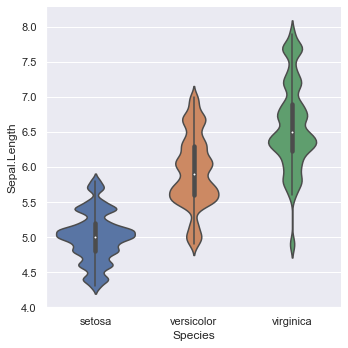

In [73]:
sns.catplot(x="Species", y="Sepal.Length", kind = "violin",data=iris, bw = 0.15)

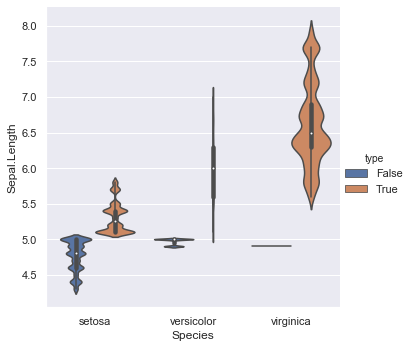

In [74]:
sns.catplot(x="Species", y="Sepal.Length", hue= "type",kind = "violin",data=iris, bw = 0.15)

It’s also possible to “split” the violins when the hue parameter has only two levels, which can allow for a more efficient use of space:

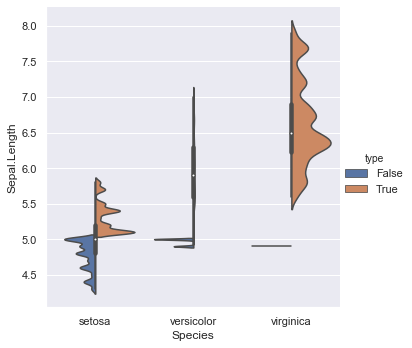

In [76]:
sns.catplot(x="Species", y="Sepal.Length", hue= "type",kind = "violin",data=iris, bw = 0.15, split = True)

Finally, there are several options for the plot that is drawn on the interior of the violins, including ways to show each individual observation instead of the summary boxplot values:

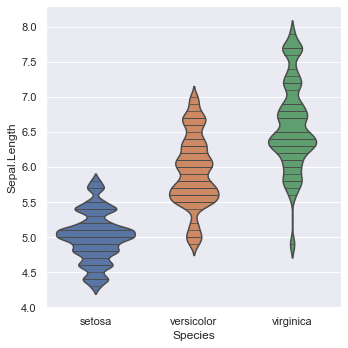

In [77]:
sns.catplot(x="Species", y="Sepal.Length", kind = "violin",data=iris, bw = 0.15, inner = "stick")

It can also be useful to combine swarmplot() or striplot() with a box plot or violin plot to show each observation along with a summary of the distribution:

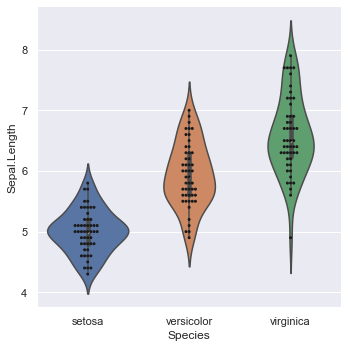

In [86]:
g = sns.catplot(x="Species", y="Sepal.Length", kind = "violin",data=iris)
# swarmplot is drawn using axis of g
sns.swarmplot(x="Species", y="Sepal.Length", color="k", size=3, data=iris, ax = g.ax)

# Count plot

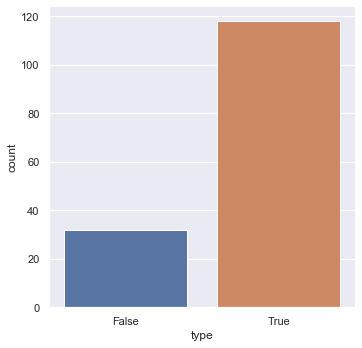

In [88]:
sns.catplot(x="type",kind = "count",data=iris)

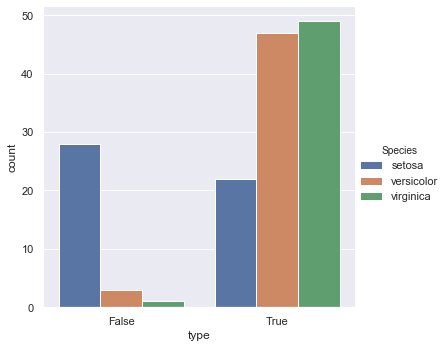

In [89]:
sns.catplot(x="type",hue = "Species",kind = "count",data=iris)

# Bar plots

A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars:

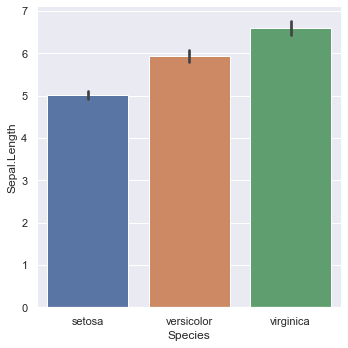

In [90]:
sns.catplot(x="Species",y = "Sepal.Length",kind = "bar",data=iris)

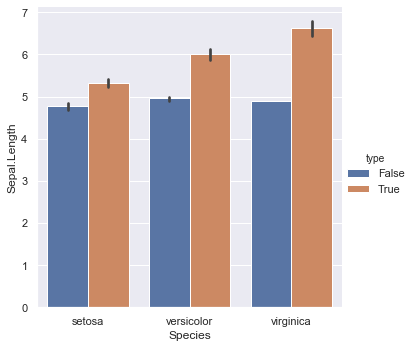

In [92]:
sns.catplot(x="Species",y = "Sepal.Length",hue = "type",kind = "bar",data=iris)

# Wide format data

While using “long-form” or “tidy” data is preferred, these functions can also by applied to “wide-form” data in a variety of formats, including pandas DataFrames or two-dimensional numpy arrays. These objects should be passed directly to the data parameter:

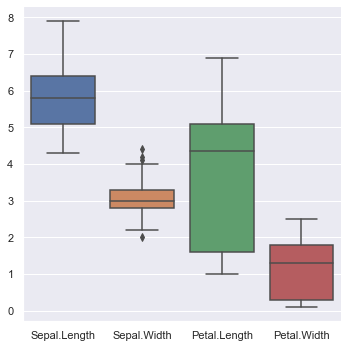

In [96]:
sns.catplot(data=iris.iloc[:,0:4], kind="box")

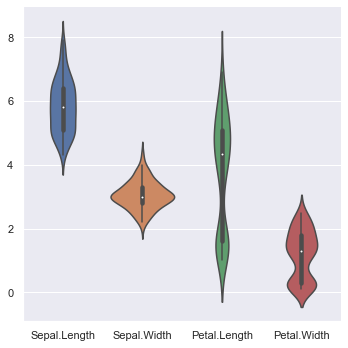

In [97]:
sns.catplot(data=iris.iloc[:,0:4], kind="violin")